# **Digital technology and Mental health**

*Sangita Das*

### **Introduction**

Now a days, technology has become an integral part of daily life, affecting various aspects of individual well-being. This dataset explores the intersection between technology usage and mental health by examining behavioral patterns and their associations with mental health indicators. The goal is to understand how factors such as social media engagement, screen time, and gaming relate to mental health outcomes, stress levels, and sleep quality. With the growing importance of mental health awareness, this dataset aims to shed light on the impact of digital habits on wellness.

### **Objectives**

- ##### **Analyze the Relationship Between Technology and Mental Health:** To examine correlations between daily technology use (e.g., hours spent on social media, gaming, and screen time) and mental health indicators such as mental health status, stress, and sleep quality.

- ##### **Identify Behavioral Patterns Influencing Wellness:** To study behavioral patterns such as physical activity, access to support systems, and work environment impacts on mental health.

- ##### **Build Predictive Models for Mental Health Trends:** To create predictive models that can provide insights into mental health trends based on technology usage.


### **Data**
This dataset is publicly available on Kaggle and can be accessed via the following link: [Kaggle - Mental Health & Technology Usage Dataset](https://www.kaggle.com/datasets/waqi786/mental-health-and-technology-usage-dataset/data). It consists of 10,000 rows and 14 columns, offering detailed insights into variables associated with technology use and mental health outcomes. The key variables include:

- **User_ID**: A unique identifier for each participant.
- **Age**: Participant's age.
- **Gender**: Categorical variable with three options: male, female, and other.
- **Technology_Usage_Hours**: Average daily time spent on technology in hours.
- **Social_Media_Usage_Hours**: Average daily time spent on social media in hours.
- **Gaming_Hours**: Average daily time spent on online gaming in hours.
- **Screen_Time_Hours**: Total average daily screen time in hours.
- **Mental_Health_Status**: Self-reported mental health status, categorized into four levels: poor, fair, good, and excellent.
- **Stress_Level**: Self-reported stress level, divided into three categories: low, medium, and high.
- **Sleep_Hours**: Average daily sleep duration in hours.
- **Physical_Activity_Hours**: Average daily physical activity duration in hours.
- **Support_Systems_Access**: Binary variable indicating whether the participant has access to support systems (yes or no).
- **Work_Environment_Impact**: Self-reported impact of work environment on mental health, categorized as positive, neutral, or negative.
- **Online_Support_Usage**: Binary variable indicating whether the participant uses online support (yes or no).

This dataset provides a comprehensive foundation for analyzing how digital habits influence mental health, supporting research and model development in this critical area.











## **Install required packages and load libraries**

In [1]:
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Install required libraries
install.packages(c("dplyr", "fastDummies", "caTools", "randomForest", "xgboost", "readr", "rpart", "caret",
                    "ggplot2", "rsample", "corrplot", "reshape2", "GGally", "neuralnet"))

# Load libraries
library(data.table)
library(rpart)
library(readr)
library(dplyr)
library(fastDummies)
library(caTools)
library(randomForest)
library(ggplot2)
library(caret)
library(xgboost)
library(neuralnet)
library(GGally)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



## **Load and Read the data**

In [3]:
# Define the file path
data = "/content/mental_health.csv"

# Read the CSV file into a data frame
mydata = read_csv(data)

head(mydata)

Rows: 10000 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): User_ID, Gender, Mental_Health_Status, Stress_Level, Support_System...
dbl (7): Age, Technology_Usage_Hours, Social_Media_Usage_Hours, Gaming_Hours...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes
USER-00006,58,Male,5.59,5.74,0.11,1.34,Poor,Low,8.61,6.54,Yes,Neutral,Yes


## **Data manipulation**

In [4]:
# Rename columns
mydata <- mydata %>%
  rename(
    id = User_ID,
    age = Age,
    gender = Gender,
    tech_Hrs = Technology_Usage_Hours,
    social_Hrs = Social_Media_Usage_Hours,
    game_hrs = Gaming_Hours,
    screen_time_hrs = Screen_Time_Hours,
    mental_health_sta = Mental_Health_Status,
    stress_level = Stress_Level,
    sleep_hrs = Sleep_Hours,
    activity_hrs = Physical_Activity_Hours,
    support_sys_access = Support_Systems_Access,
    work_env_impact = Work_Environment_Impact,
    online_use = Online_Support_Usage
  )

By renaming the columns in this dataset, I aim to improve readability and simplify the variable names for easier understanding and reference throughout the analysis.

In [5]:
# drop 'id' column
mydata$id<-NULL

By dropping the id column, I try to simplify the dataset by removing an element that does not contribute to the analysis.

### **Explore the data**

In [6]:
# Display the first few rows of the data
print("first few rows of the data")
head(mydata)

# Check the number of rows
num_rows <- nrow(mydata)

# Check the number of columns
num_cols <- ncol(mydata)

# Print the shape of the data using concatenate
cat("The dataset has", num_rows, "rows and", num_cols, "columns.\n")

# check the data types
print("structure of the data")
str(mydata)

# to see the modified column names
print("column names")
colnames(mydata)

[1] "first few rows of the data"


age,gender,tech_Hrs,social_Hrs,game_hrs,screen_time_hrs,mental_health_sta,stress_level,sleep_hrs,activity_hrs,support_sys_access,work_env_impact,online_use
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes
58,Male,5.59,5.74,0.11,1.34,Poor,Low,8.61,6.54,Yes,Neutral,Yes


The dataset has 10000 rows and 13 columns.
[1] "structure of the data"
spc_tbl_ [10,000 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age               : num [1:10000] 23 21 51 25 53 58 63 51 57 31 ...
 $ gender            : chr [1:10000] "Female" "Male" "Male" "Female" ...
 $ tech_Hrs          : num [1:10000] 6.57 3.01 3.04 3.84 1.2 ...
 $ social_Hrs        : num [1:10000] 6 2.57 6.14 4.48 0.56 5.74 2.55 4.1 4.11 7.23 ...
 $ game_hrs          : num [1:10000] 0.68 3.74 1.26 2.59 0.29 0.11 3.79 4.74 0.08 0.81 ...
 $ screen_time_hrs   : num [1:10000] 12.36 7.61 3.16 13.08 12.63 ...
 $ mental_health_sta : chr [1:10000] "Good" "Poor" "Fair" "Excellent" ...
 $ stress_level      : chr [1:10000] "Low" "High" "High" "Medium" ...
 $ sleep_hrs         : num [1:10000] 8.01 7.28 8.04 5.62 5.55 8.61 8.61 7.11 7.19 5.09 ...
 $ activity_hrs      : num [1:10000] 6.71 5.88 9.81 5.28 4 6.54 1.34 5.27 5.22 0.47 ...
 $ support_sys_access: chr [1:10000] "No" "Yes" "No" "Yes" ...
 $ work_env_impact   : c

[1] "age"                "gender"             "tech_Hrs"          
 [4] "social_Hrs"         "game_hrs"           "screen_time_hrs"   
 [7] "mental_health_sta"  "stress_level"       "sleep_hrs"         
[10] "activity_hrs"       "support_sys_access" "work_env_impact"   
[13] "online_use"

The above data exploration provides a summary of the dataset by displaying the first few rows, the number of rows and columns, the structure and data types of the variables, and the updated column names for better clarity and understanding.

### **Missing values**

In [7]:
# Check for missing values of all columns
colSums(is.na(mydata))

age             gender           tech_Hrs         social_Hrs 
                 0                  0                  0                  0 
          game_hrs    screen_time_hrs  mental_health_sta       stress_level 
                 0                  0                  0                  0 
         sleep_hrs       activity_hrs support_sys_access    work_env_impact 
                 0                  0                  0                  0 
        online_use 
                 0

The dataset contains no missing values.

#### **Categorical variables**

##### **Gender**




In [8]:
# to know the category of gender
unique(mydata$gender)

[1] "Female" "Male"   "Other"

In [9]:
# Count the occurrences of each category in the Gender column
table(mydata$gender)


Female   Male  Other 
  3286   3350   3364 

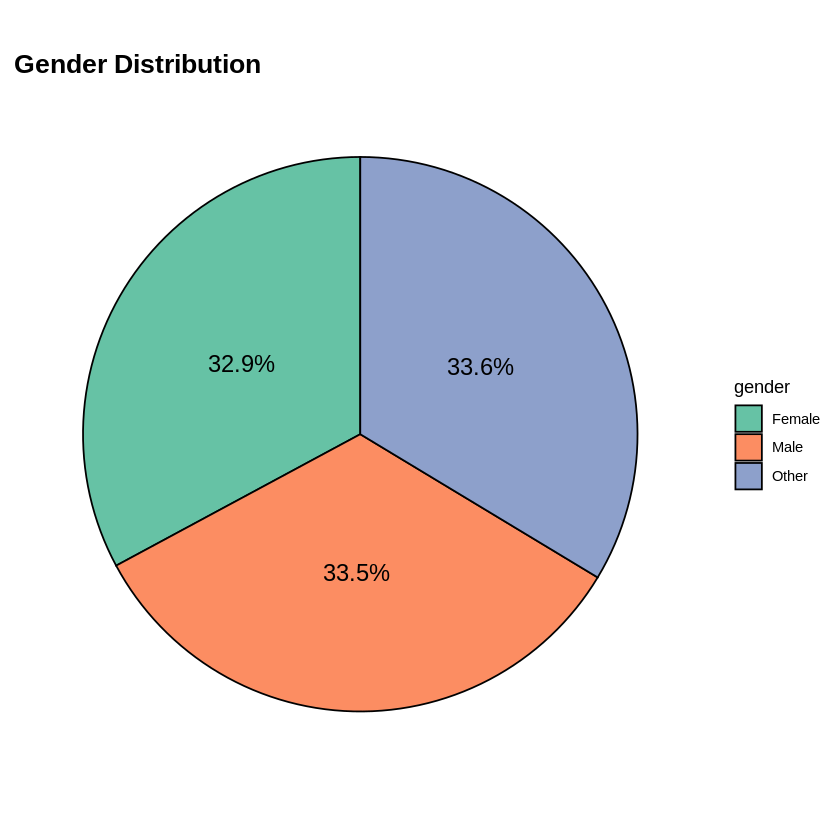

In [10]:
## visualization of data using pie chart
# Calculate proportions of each gender category
gender_data <- mydata %>%
  count(gender) %>%
  mutate(percentage = n / sum(n) * 100) %>%
  mutate(label = paste0(round(percentage, 1), "%"))  # Create percentage labels

# Plot Gender Distribution as a pie chart with percentage labels
ggplot(gender_data, aes(x = "", y = percentage, fill = gender)) +
  geom_bar(stat = "identity", width = 1, color = "black") +
  coord_polar(theta = "y") +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5), color = "black", size = 5) +
  labs(title = "Gender Distribution") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16),  # Bold and larger title
    axis.title.x = element_blank(),                      # Remove x-axis label
    axis.title.y = element_blank(),                      # Remove y-axis label
    axis.text = element_blank(),                         # Remove axis text/ticks
    panel.grid = element_blank()                         # Remove grid lines
  ) +
  scale_fill_brewer(palette = "Set2")  # Use color palette


In [11]:
## converting categorical to numerical variable by one-hot encoding
# Create one-hot encoded columns for gender
mydata_gender <- mydata %>%
  mutate(
    male = ifelse(tolower(trimws(gender)) == "male", 1, 0),
    female = ifelse(tolower(trimws(gender)) == "female", 1, 0),
    other = ifelse(tolower(trimws(gender)) == "other", 1, 0)
  ) %>%
  select(-gender)  # Remove the original gender column

# Display the first few rows of the one-hot encoded data
print("One-Hot Encoded Data:")
head(mydata_gender)

[1] "One-Hot Encoded Data:"


age,tech_Hrs,social_Hrs,game_hrs,screen_time_hrs,mental_health_sta,stress_level,sleep_hrs,activity_hrs,support_sys_access,work_env_impact,online_use,male,female,other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
23,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes,0,1,0
21,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No,1,0,0
51,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No,1,0,0
25,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes,0,1,0
53,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes,1,0,0
58,5.59,5.74,0.11,1.34,Poor,Low,8.61,6.54,Yes,Neutral,Yes,1,0,0


##### **Mental_health_status**

In [12]:
table(mydata$mental_health_sta)


Excellent      Fair      Good      Poor 
     2518      2490      2508      2484 

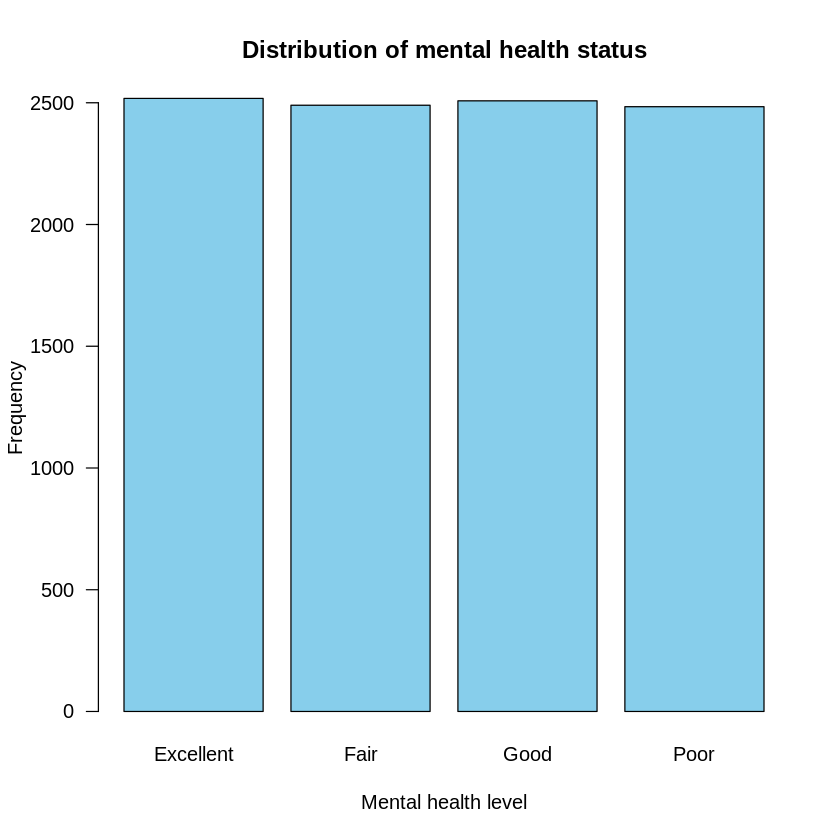

In [13]:
## visualization of the data using bar plot
# Calculate the frequency of each category in mental_health_sta
mental_health_counts <- table(mydata$mental_health_sta)

# Plot the distribution using a bar plot
barplot(mental_health_counts,
        main = "Distribution of mental health status",
        xlab = "Mental health level",
        ylab = "Frequency",
        col = "skyblue",
        border = "black",
        las = 1)  # las = 1 for horizontal labels

In [14]:
# converting categorical variable into a numerical format
mydata_mental <- mydata_gender %>%
  mutate(mental_health_sta = case_when(
    tolower(trimws(mental_health_sta)) == "poor" ~ 0,
    tolower(trimws(mental_health_sta)) == "fair" ~ 1,
    tolower(trimws(mental_health_sta)) == "good" ~ 2,
    tolower(trimws(mental_health_sta)) == "excellent" ~ 3,
    TRUE ~ NA_real_  # This handles any unexpected values
  ))

##### **Stress_Level**

In [15]:
unique(mydata$stress_level)

[1] "Low"    "High"   "Medium"

In [16]:
table(mydata$stress_level)


  High    Low Medium 
  3330   3332   3338 

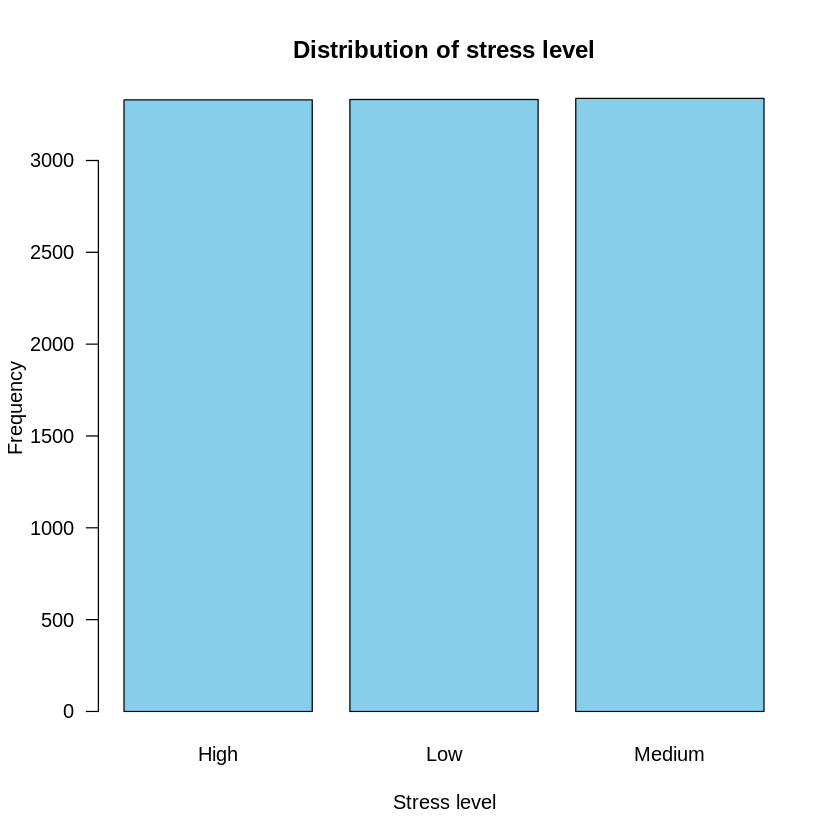

In [17]:
## visualization of the data using bar plot
# Calculate the frequency of each category in mental_health_sta
mental_stress_counts <- table(mydata$stress_level)

# Plot the distribution using a bar plot
barplot(mental_stress_counts,
        main = "Distribution of stress level",
        xlab = "Stress level",
        ylab = "Frequency",
        col = "skyblue",
        border = "black",
        las = 1)  # las = 1 for horizontal labels

In [18]:
# converting categorical variable into a numerical format
mydata_stress <- mydata_mental %>%
  mutate(stress_level = case_when(
    tolower(trimws(stress_level)) == "low" ~ 0,
    tolower(trimws(stress_level)) == "medium" ~ 1,
    tolower(trimws(stress_level)) == "high" ~ 2,
    TRUE ~ NA_real_  # This handles any unexpected values
  ))

# Display the first 10 rows of the modified data
head(mydata_stress, 2)


age,tech_Hrs,social_Hrs,game_hrs,screen_time_hrs,mental_health_sta,stress_level,sleep_hrs,activity_hrs,support_sys_access,work_env_impact,online_use,male,female,other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
23,6.57,6.00,0.68,12.36,2,0,8.01,6.71,No,Negative,Yes,0,1,0
21,3.01,2.57,3.74,7.61,0,2,7.28,5.88,Yes,Positive,No,1,0,0


##### **Support_Systems_Access**

In [19]:
# converting categorical to numerical variables
mydata_support <- mydata_stress %>%
  mutate(support_sys_access = case_when(
    tolower(trimws(support_sys_access)) == "no" ~ 0,
    tolower(trimws(support_sys_access)) == "yes" ~ 1,
    TRUE ~ NA_real_  # This handles any unexpected values
  ))

# Display the first 10 rows of the modified data
head(mydata_support, 2)


age,tech_Hrs,social_Hrs,game_hrs,screen_time_hrs,mental_health_sta,stress_level,sleep_hrs,activity_hrs,support_sys_access,work_env_impact,online_use,male,female,other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
23,6.57,6.00,0.68,12.36,2,0,8.01,6.71,0,Negative,Yes,0,1,0
21,3.01,2.57,3.74,7.61,0,2,7.28,5.88,1,Positive,No,1,0,0


##### **Work_Environment_Impact**

In [20]:
mydata_env <- mydata_support %>%
  mutate(work_env_impact = case_when(
    tolower(trimws(work_env_impact)) == "negative" ~ 0,
    tolower(trimws(work_env_impact)) == "neutral" ~ 1,
    tolower(trimws(work_env_impact)) == "positive" ~ 2,
    TRUE ~ NA_real_  # This handles any unexpected values
  ))

# Display the first 10 rows of the modified data
head(mydata_env, 2)

age,tech_Hrs,social_Hrs,game_hrs,screen_time_hrs,mental_health_sta,stress_level,sleep_hrs,activity_hrs,support_sys_access,work_env_impact,online_use,male,female,other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
23,6.57,6.00,0.68,12.36,2,0,8.01,6.71,0,0,Yes,0,1,0
21,3.01,2.57,3.74,7.61,0,2,7.28,5.88,1,2,No,1,0,0


##### **Online_Support_Usage**

In [21]:
mydata_online <- mydata_env %>%
  mutate(online_use = case_when(
    tolower(trimws(online_use)) == "no" ~ 0,
    tolower(trimws(online_use)) == "yes" ~ 1,
    TRUE ~ NA_real_  # This handles any unexpected values
  ))

# Display the first 10 rows of the modified data
head(mydata_online, 2)

age,tech_Hrs,social_Hrs,game_hrs,screen_time_hrs,mental_health_sta,stress_level,sleep_hrs,activity_hrs,support_sys_access,work_env_impact,online_use,male,female,other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,6.57,6.00,0.68,12.36,2,0,8.01,6.71,0,0,1,0,1,0
21,3.01,2.57,3.74,7.61,0,2,7.28,5.88,1,2,0,1,0,0


In the above code, I examine the details of categorical variables such as `gender`, `Mental_Health_Status`, `Stress_Level`, `Support_Systems_Access`, `Work_Environment_Impact`, and `Online_Support_Usage`. I then visualize these variables and convert them into numerical values to prepare the data for analysis.

In [22]:
# copy the data
library(data.table)
data <- copy(mydata_online)
head(data,2)

age,tech_Hrs,social_Hrs,game_hrs,screen_time_hrs,mental_health_sta,stress_level,sleep_hrs,activity_hrs,support_sys_access,work_env_impact,online_use,male,female,other
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,6.57,6.00,0.68,12.36,2,0,8.01,6.71,0,0,1,0,1,0
21,3.01,2.57,3.74,7.61,0,2,7.28,5.88,1,2,0,1,0,0


#### **Numerical Variables**

##### To gain insights into the numerical variables, I visualize them for better understanding.

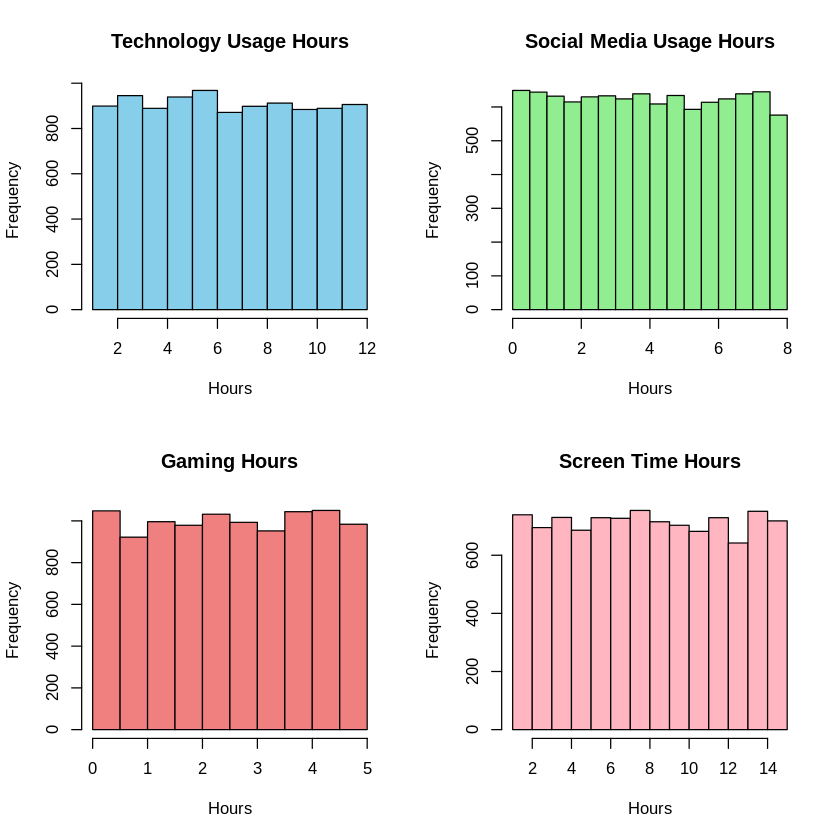

In [23]:
## Histogram plotting
# Set up a 2x2 plot layout
par(mfrow = c(2, 2))

# Plot histograms for each variable
hist(mydata$tech_Hrs, main = "Technology Usage Hours", xlab = "Hours", col = "skyblue", border = "black")
hist(mydata$social_Hrs, main = "Social Media Usage Hours", xlab = "Hours", col = "lightgreen", border = "black")
hist(mydata$game_hrs, main = "Gaming Hours", xlab = "Hours", col = "lightcoral", border = "black")
hist(mydata$screen_time_hrs, main = "Screen Time Hours", xlab = "Hours", col = "lightpink", border = "black")


##### **Boxplot for detecting outliers**

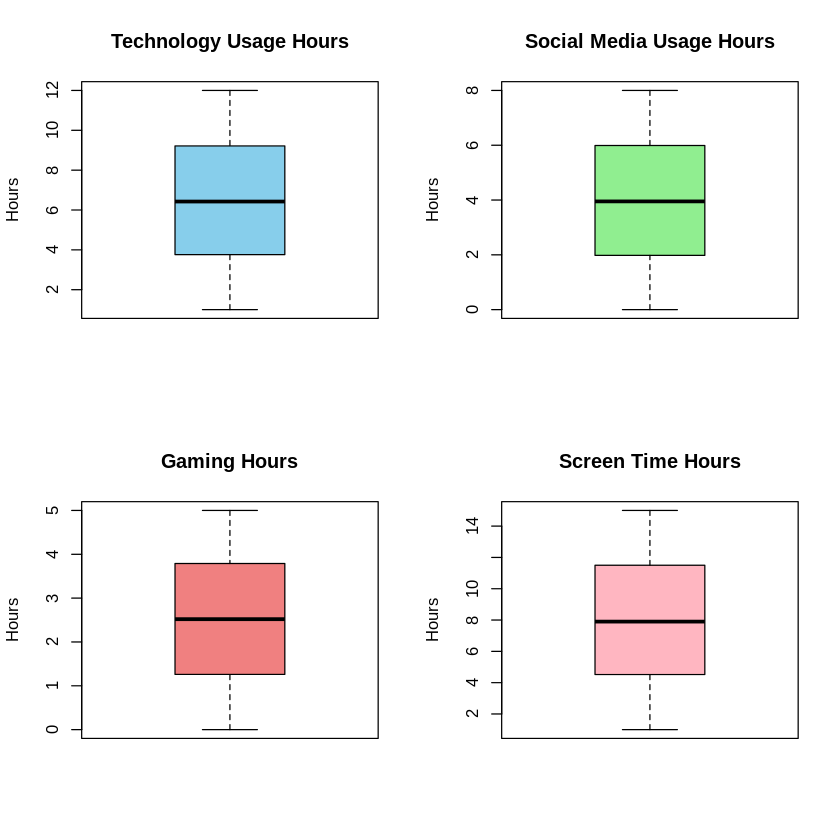

In [24]:
# Set up a 2x2 plot layout
par(mfrow = c(2, 2))

# Plot box plots for each variable to detect outliers
boxplot(mydata$tech_Hrs, main = "Technology Usage Hours", ylab = "Hours", col = "skyblue", border = "black")
boxplot(mydata$social_Hrs, main = "Social Media Usage Hours", ylab = "Hours", col = "lightgreen", border = "black")
boxplot(mydata$game_hrs, main = "Gaming Hours", ylab = "Hours", col = "lightcoral", border = "black")
boxplot(mydata$screen_time_hrs, main = "Screen Time Hours", ylab = "Hours", col = "lightpink", border = "black")


Above four numerical variables contain no outliers.

In [25]:
# summary statistics
# Print a label, then the summary
cat("Summary of the data:\n")
summary(data)

Summary of the data:


      age           tech_Hrs        social_Hrs       game_hrs    
 Min.   :18.00   Min.   : 1.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:29.00   1st Qu.: 3.760   1st Qu.:1.980   1st Qu.:1.260  
 Median :42.00   Median : 6.425   Median :3.950   Median :2.520  
 Mean   :41.52   Mean   : 6.474   Mean   :3.972   Mean   :2.516  
 3rd Qu.:54.00   3rd Qu.: 9.213   3rd Qu.:5.990   3rd Qu.:3.790  
 Max.   :65.00   Max.   :12.000   Max.   :8.000   Max.   :5.000  
 screen_time_hrs  mental_health_sta  stress_level      sleep_hrs    
 Min.   : 1.000   Min.   :0.000     Min.   :0.0000   Min.   :4.000  
 1st Qu.: 4.520   1st Qu.:1.000     1st Qu.:0.0000   1st Qu.:5.260  
 Median : 7.900   Median :2.000     Median :1.0000   Median :6.500  
 Mean   : 7.976   Mean   :1.506     Mean   :0.9998   Mean   :6.501  
 3rd Qu.:11.500   3rd Qu.:3.000     3rd Qu.:2.0000   3rd Qu.:7.760  
 Max.   :15.000   Max.   :3.000     Max.   :2.0000   Max.   :9.000  
  activity_hrs    support_sys_access work_env_impact   

After data manipulation, I review the summary of the dataset to gain a better understanding of its structure and content.

### **Visualize the relationship between technology usage and mental health**

Warning message:
“The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


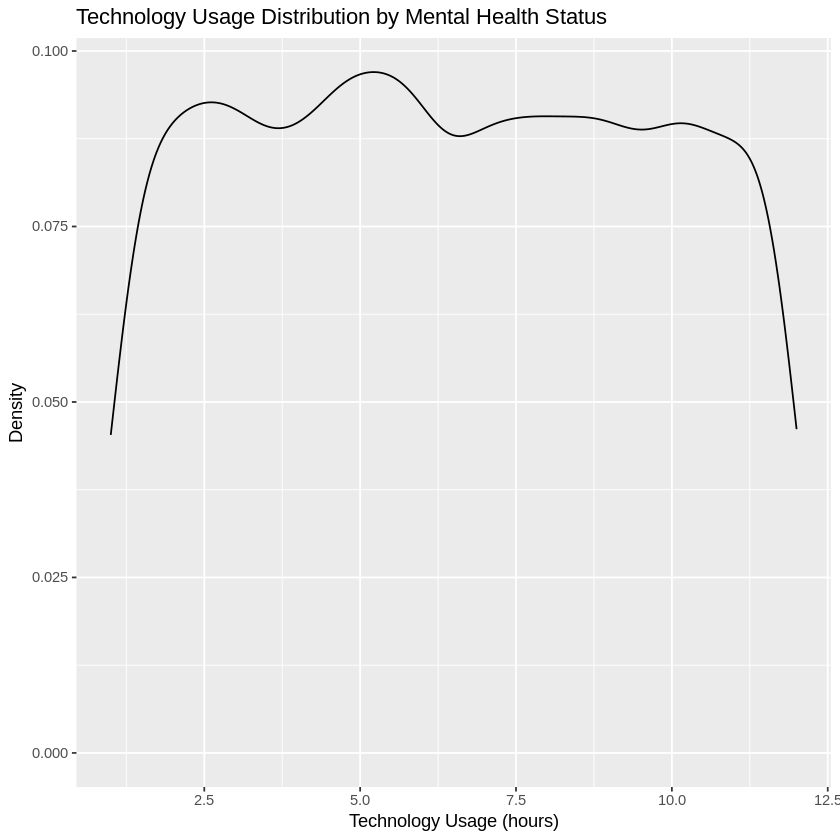

In [26]:
# Density plot of tech usage by mental health status
ggplot(data, aes(x = tech_Hrs, fill = mental_health_sta)) +
    geom_density(alpha = 0.6) +
    labs(title = "Technology Usage Distribution by Mental Health Status", x = "Technology Usage (hours)", y = "Density")


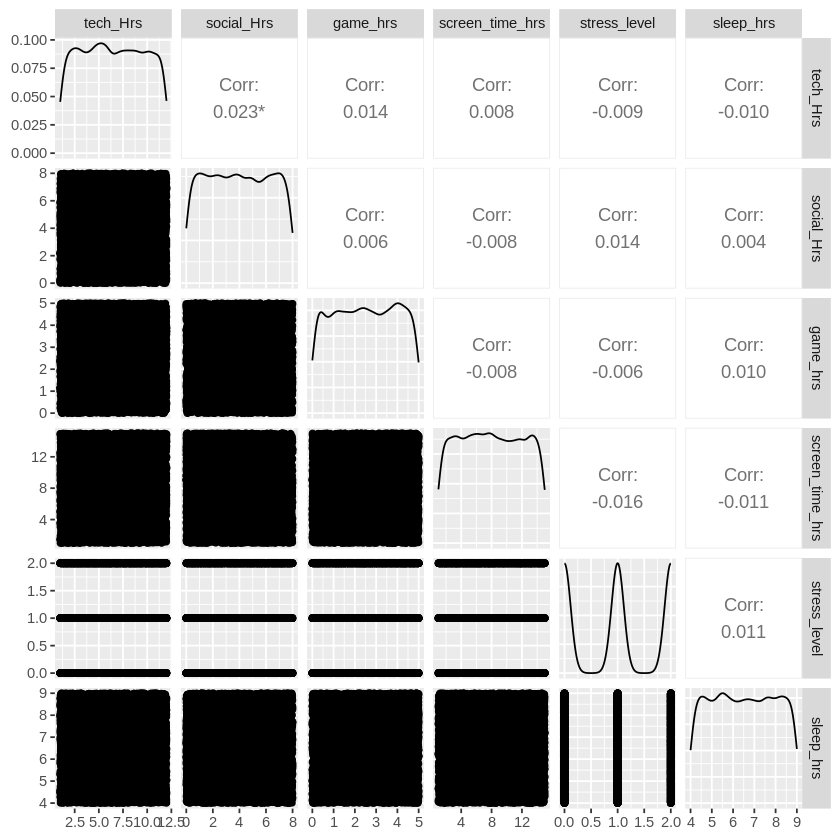

In [27]:
# Pair Plot (Scatterplot Matrix)

ggpairs(data[, c("tech_Hrs", "social_Hrs", "game_hrs", "screen_time_hrs", "stress_level", "sleep_hrs")])


### **Identify Behavioral Patterns Influencing Wellness**

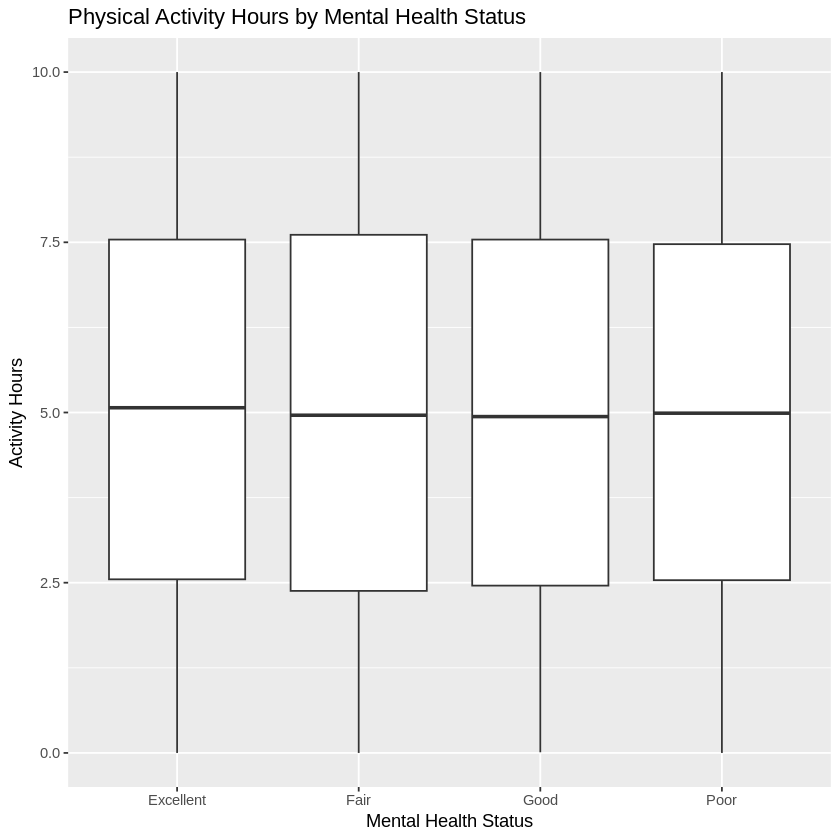

In [28]:
## Box plot
ggplot(mydata, aes(x = as.factor(mental_health_sta), y = activity_hrs)) +
  geom_boxplot() +
  labs(title = "Physical Activity Hours by Mental Health Status", x = "Mental Health Status", y = "Activity Hours")


Use box plots to examine activity_hrs (physical activity hours) across mental_health_sta categories to see how physical activity relates to mental health status.

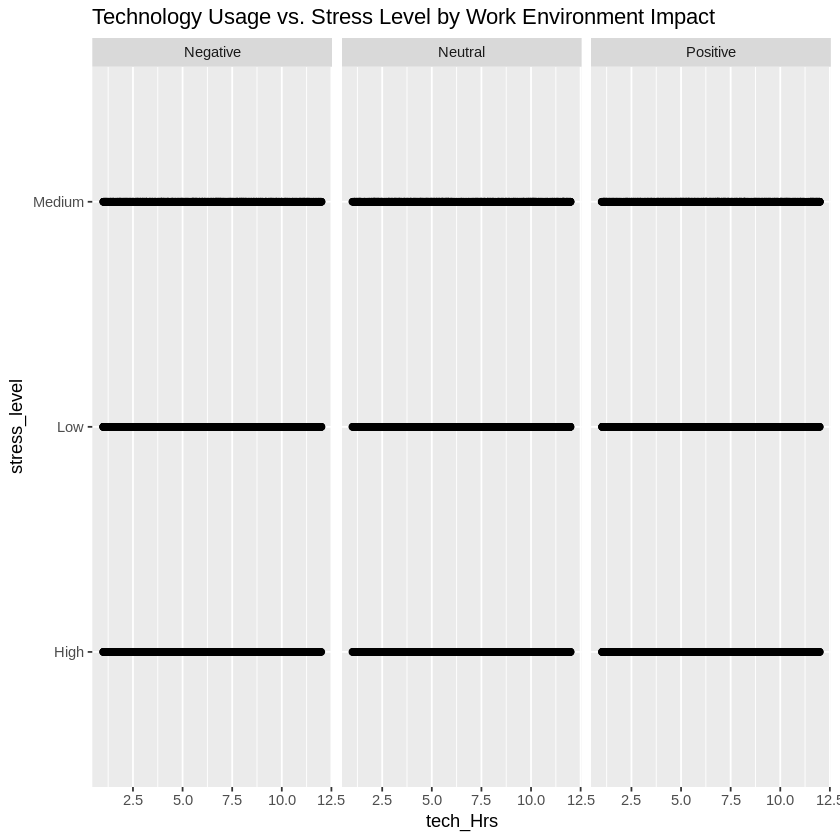

In [29]:
## Scatter Plot with Faceting
ggplot(mydata, aes(x = tech_Hrs, y = stress_level)) +
  geom_point() +
  facet_wrap(~ work_env_impact) +
  labs(title = "Technology Usage vs. Stress Level by Work Environment Impact")


A scatter plot of `tech_Hrs` (technology usage hours) versus `stress_level`, faceted by `work_env_impact`.

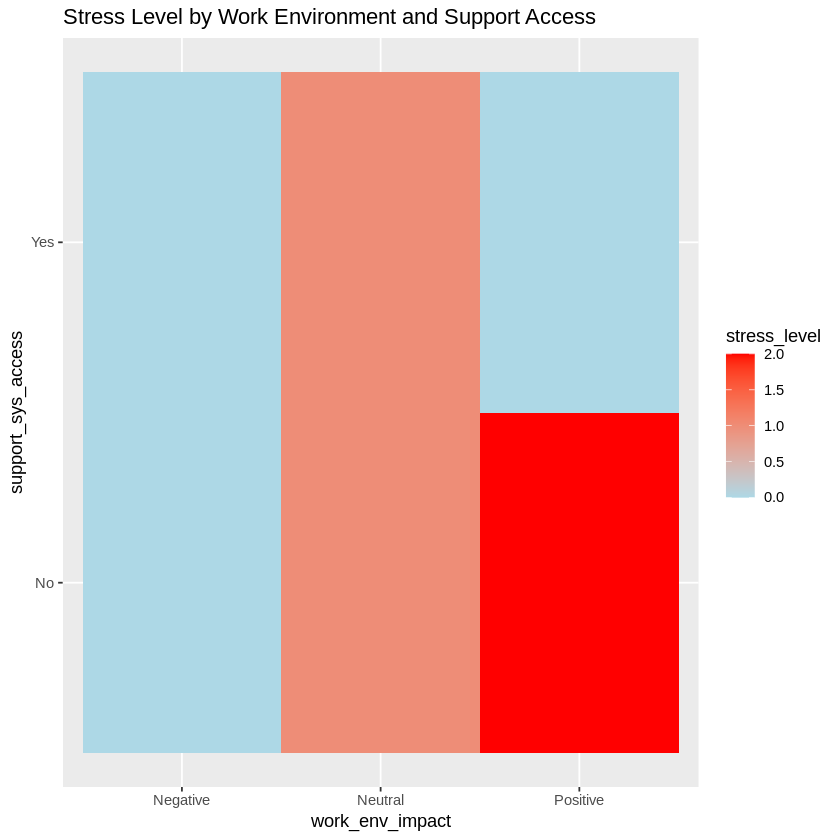

In [30]:
## Heatmaps
ggplot(mydata_stress, aes(x = work_env_impact, y = support_sys_access, fill = stress_level)) +
  geom_tile() +
  scale_fill_gradient(low = "lightblue", high = "red") +
  labs(title = "Stress Level by Work Environment and Support Access")


A heatmap to visualize the interaction between `work_env_impact` and `support_sys_access`, with color intensity representing average `stress_level`.

### **Feature importance**

I analyze the feature importance to identify the most correlated features, helping to understand which variables have the greatest impact on the target variable `mental_health_status`. By reviewing the feature importance, I can prioritize the most influential features, potentially reducing noise and improving the overall performance of the model.

In [31]:
## applying xgboost model for feature selection of the model

# Prepare data
data_matrix <- as.matrix(data[, -which(names(data) == "mental_health_sta")])
label <- data$mental_health_sta

# Fit the XGBoost model
model <- xgboost(data = data_matrix, label = label, nrounds = 100, objective = "reg:squarederror")

# Feature importance
importance_matrix <- xgb.importance(model = model)
print(importance_matrix)


[1]	train-rmse:1.315922 
[2]	train-rmse:1.209783 
[3]	train-rmse:1.149801 
[4]	train-rmse:1.118422 
[5]	train-rmse:1.098672 
[6]	train-rmse:1.086403 
[7]	train-rmse:1.080556 
[8]	train-rmse:1.071047 
[9]	train-rmse:1.067106 
[10]	train-rmse:1.058471 
[11]	train-rmse:1.049723 
[12]	train-rmse:1.042654 
[13]	train-rmse:1.040423 
[14]	train-rmse:1.039237 
[15]	train-rmse:1.032995 
[16]	train-rmse:1.029657 
[17]	train-rmse:1.026887 
[18]	train-rmse:1.021691 
[19]	train-rmse:1.018446 
[20]	train-rmse:1.014238 
[21]	train-rmse:1.008743 
[22]	train-rmse:1.003892 
[23]	train-rmse:1.001317 
[24]	train-rmse:0.997954 
[25]	train-rmse:0.989775 
[26]	train-rmse:0.982261 
[27]	train-rmse:0.978791 
[28]	train-rmse:0.972195 
[29]	train-rmse:0.964688 
[30]	train-rmse:0.959739 
[31]	train-rmse:0.958473 
[32]	train-rmse:0.952966 
[33]	train-rmse:0.950526 
[34]	train-rmse:0.944986 
[35]	train-rmse:0.939727 
[36]	train-rmse:0.936137 
[37]	train-rmse:0.929298 
[38]	train-rmse:0.925595 
[39]	train-rmse:0.919

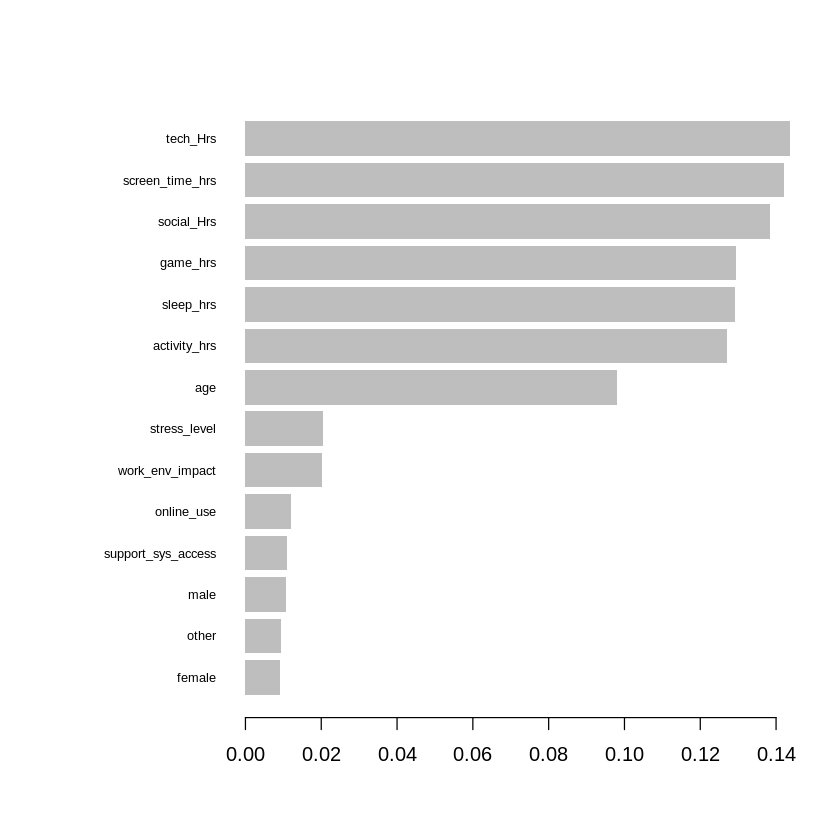

In [32]:
# Visualize the feature importance
xgb.plot.importance(importance_matrix)

### **Create Train and Test Sets**

In [33]:
# "mental_health_sta" is the target variable
set.seed(123)
trainIndex <- createDataPartition(data$mental_health_sta, p = 0.8, list = FALSE)
train <- data[trainIndex, ]
test <- data[-trainIndex, ]

# Select the top 4 features based on importance
selected_features <- c("tech_Hrs", "social_Hrs", "game_hrs",
                       "screen_time_hrs", "stress_level", "sleep_hrs",
                       "activity_hrs", "age")


### **Define a Function for Model Evaluation**

In [34]:
# create a function for evaluation of the model
evaluate_model <- function(predictions, actual) {
  mae <- mean(abs(predictions - actual))
  mse <- mean((predictions - actual)^2)
  rmse <- sqrt(mse)
  r2 <- 1 - (sum((predictions - actual)^2) / sum((actual - mean(actual))^2))
  return(data.frame(MAE = mae, MSE = mse, RMSE = rmse, R2 = r2))
}


#### **Linear Regression Model**

In [35]:
# Train Linear Regression model
lm_model <- lm(mental_health_sta ~ ., data = train[, c(selected_features, "mental_health_sta")])
lm_predictions <- predict(lm_model, newdata = test[, selected_features])
lm_results <- evaluate_model(lm_predictions, test$mental_health_sta)
print(lm_results)


        MAE      MSE     RMSE           R2
1 0.9940825 1.238549 1.112901 -0.002211139


#### **Decision Tree**

In [36]:
# Train Decision Tree model
tree_model <- rpart(mental_health_sta ~ ., data = train[, c(selected_features, "mental_health_sta")])
tree_predictions <- predict(tree_model, newdata = test[, selected_features])
tree_results <- evaluate_model(tree_predictions, test$mental_health_sta)
print(tree_results)



        MAE      MSE     RMSE            R2
1 0.9929717 1.235893 1.111707 -6.215244e-05


#### **Random Forest**

In [37]:
# Train Random Forest model
rf_model <- randomForest(mental_health_sta ~ ., data = train[, c(selected_features, "mental_health_sta")], ntree = 100)
rf_predictions <- predict(rf_model, newdata = test[, selected_features])
rf_results <- evaluate_model(rf_predictions, test$mental_health_sta)
print(rf_results)


Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


        MAE      MSE     RMSE          R2
1 0.9982418 1.276618 1.129875 -0.03301544


#### **XGBoost**

In [38]:
# Prepare data for XGBoost
train_matrix <- xgb.DMatrix(data = as.matrix(train[, selected_features]), label = train$mental_health_sta)
test_matrix <- xgb.DMatrix(data = as.matrix(test[, selected_features]))

# Train XGBoost model
xgb_model <- xgboost(data = train_matrix, nrounds = 100, objective = "reg:squarederror", verbose = 0)
xgb_predictions <- predict(xgb_model, test_matrix)
xgb_results <- evaluate_model(xgb_predictions, test$mental_health_sta)
print(xgb_results)

       MAE      MSE     RMSE         R2
1 1.031521 1.440026 1.200011 -0.1652426


#### **K-fold regression**




In [39]:
# Set up cross-validation with 10 folds (you can change the number of folds if needed)
train_control <- trainControl(method = "cv", number = 10)

# Train the model using cross-validation
set.seed(123)  # For reproducibility
kfold_model <- train(mental_health_sta ~ ., data = train[, c(selected_features, "mental_health_sta")],
                     method = "lm",  # You can specify other regression methods here
                     trControl = train_control)

# Predict on the test data
kfold_predictions <- predict(kfold_model, newdata = test[, selected_features])

# Evaluate the results
kfold_results <- evaluate_model(kfold_predictions, test$mental_health_sta)
print(kfold_results)

        MAE      MSE     RMSE           R2
1 0.9940825 1.238549 1.112901 -0.002211139


#### **Simple Neural network**



In [40]:
# Scale the data (neural networks work better with scaled data)
scaled_train <- as.data.frame(scale(train[, c(selected_features, "mental_health_sta")]))
scaled_test <- as.data.frame(scale(test[, selected_features]))

# Train the neural network model
nn_model <- neuralnet(mental_health_sta ~ ., data = scaled_train, hidden = c(5), linear.output = TRUE)

# Predict on the test data
nn_predictions <- compute(nn_model, scaled_test)
nn_predictions <- nn_predictions$net.result

# Evaluate the results
nn_results <- evaluate_model(nn_predictions, scale(test$mental_health_sta))
print(nn_results)


        MAE      MSE     RMSE          R2
1 0.8949181 1.025558 1.012698 -0.02607131


### **Comparison of the Results**

In [41]:
# Combine results for comparison
results <- rbind(
  Linear_Regression = lm_results,
  Decision_Tree = tree_results,
  Random_Forest = rf_results,
  XGBoost = xgb_results,
  K_Fold_Regression = kfold_results,
  Simple_Neural_Network = nn_results
)

# Convert results to a data frame
results_df <- as.data.frame(results)

# Sort the results by RMSE column in ascending order
results_sorted <- results_df[order(results_df$RMSE), ]

# Print the sorted results for comparison
print(results_sorted)


                            MAE      MSE     RMSE            R2
Simple_Neural_Network 0.8949181 1.025558 1.012698 -2.607131e-02
Decision_Tree         0.9929717 1.235893 1.111707 -6.215244e-05
Linear_Regression     0.9940825 1.238549 1.112901 -2.211139e-03
K_Fold_Regression     0.9940825 1.238549 1.112901 -2.211139e-03
Random_Forest         0.9982418 1.276618 1.129875 -3.301544e-02
XGBoost               1.0315205 1.440026 1.200011 -1.652426e-01
